In [12]:
import numpy as np

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.image as Image
import PIL.Image as Image


In [13]:
m_check = ModelCheckpoint("model/--{epoch:02d}--{val_loss:.4f}.hdf5", monitor = 'val_loss',save_best_only=True)


In [14]:
x = np.load("../train.npy")
print(x[0])

y = np.load("y.npy")


[[[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]
  [0.2        0.2        0.2       ]
  ...
  [0.2        0.2        0.2       ]
  [0.36470588 0.36470588 0.36470588]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]


In [15]:
def create_model():
    n = 16
    learn = 5e-4
    opt = optimizers.adam(lr=learn)

    
    model = Sequential()
    model.add(Conv2D(n*16,(3,3),padding='same',activation='elu',input_shape=(112,150,3)))
    model.add(Conv2D(n*8,(3,3),padding='same',activation='elu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*4,(3,3),padding='same',activation='elu'))
    model.add(Conv2D(n*2,(3,3),padding='same',activation='elu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(n*4,activation="elu"))
    model.add(Dropout(0.3))
    model.add(Dense(n*2,activation="elu"))
    model.add(Dropout(0.3))
    model.add(Dense(9,activation="softmax"))

    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['acc'])

    return model


In [16]:
seed = np.random.seed(666)

kf = KFold(n_splits=3, shuffle=True,random_state=seed)


In [17]:

x_train,x_test , y_train,y_test = train_test_split(x,y,shuffle=True , random_state=seed)

In [18]:
# history = []
# model = create_model()
# for train_i,test_i in kf.split(x):
#     train_x,train_y = x[train_i],y[train_i]
#     test_x, test_y = x[test_i], y[test_i]

#     hist = model.fit(train_x,train_y,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])
#     history.append(hist)
#     score = model.evaluate(test_x,test_y)
#     print(score)

In [19]:
model = create_model()
# model = load_model("./model/--30--0.0843.hdf5")
history = model.fit(x_train,y_train,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])

Epoch 1/50
85/85 [==============================] - 9s 102ms/step - loss: 2.0348 - acc: 0.2762 - val_loss: 1.4821 - val_acc: 0.4408
Epoch 2/50
85/85 [==============================] - 6s 74ms/step - loss: 1.1780 - acc: 0.5721 - val_loss: 1.3061 - val_acc: 0.5569
Epoch 3/50
85/85 [==============================] - 6s 72ms/step - loss: 0.8050 - acc: 0.6977 - val_loss: 1.6047 - val_acc: 0.5083
Epoch 4/50
85/85 [==============================] - 6s 70ms/step - loss: 0.5948 - acc: 0.7863 - val_loss: 0.8394 - val_acc: 0.7145
Epoch 5/50
85/85 [==============================] - 6s 70ms/step - loss: 0.4753 - acc: 0.8380 - val_loss: 1.3217 - val_acc: 0.5948
Epoch 6/50
85/85 [==============================] - 6s 70ms/step - loss: 0.3848 - acc: 0.8672 - val_loss: 2.1405 - val_acc: 0.4716
Epoch 7/50
85/85 [==============================] - 6s 69ms/step - loss: 0.2919 - acc: 0.9032 - val_loss: 1.6801 - val_acc: 0.5770
Epoch 8/50
85/85 [==============================] - 6s 69ms/step - loss: 0.2601 - 

In [20]:
predy = model.evaluate(x_test,y_test)
print(predy)

36/36 [==============================] - 1s 26ms/step - loss: 3.2791 - acc: 0.5653
[3.279127597808838, 0.5653333067893982]


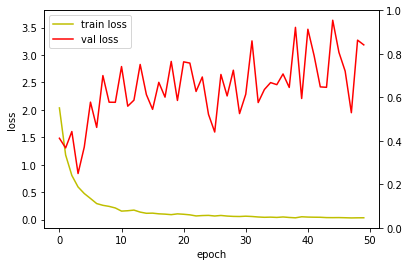

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')


plt.show()

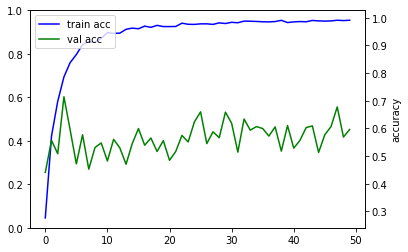

In [22]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history


acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()